In [4]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from pyclustering.cluster.kmedoids import kmedoids
import matplotlib.pyplot as plt

In [6]:
# Load your dataset (replace this part with your data loading code)
# For this example, I'll use a synthetic dataset
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Preprocessing 
# min-max scaling
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Function to visualize hierarchical clustering dendrogram


In [7]:

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:

# K-Medoids clustering
initial_medoids = [0, 1, 2]  # indices of initial medoids
kmedoids_instance = kmedoids(X_scaled, initial_medoids)
kmedoids_instance.process()
kmedoids_labels = kmedoids_instance.get_clusters()


In [9]:


# Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(X_scaled)

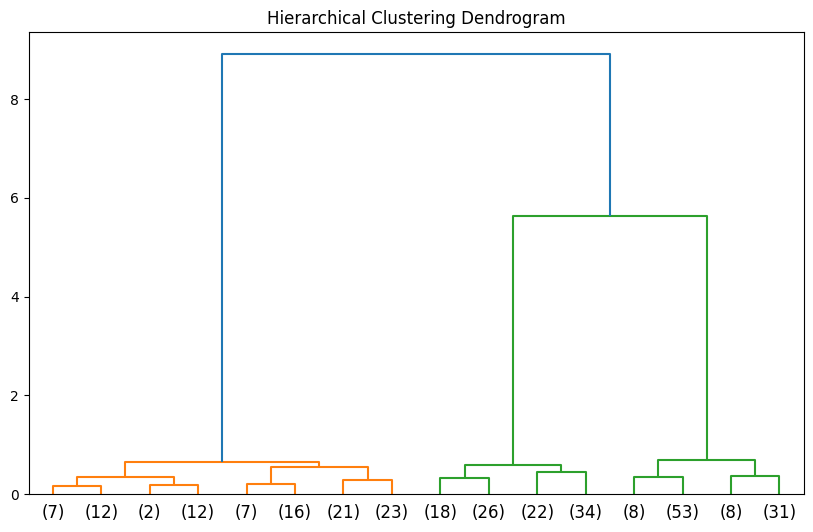

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(linkage_matrix, **kwargs):
    dendrogram(linkage_matrix, **kwargs)

# Hierarchical clustering
hierarch_cluster = linkage(X_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(10, 6))
plot_dendrogram(hierarch_cluster, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [11]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

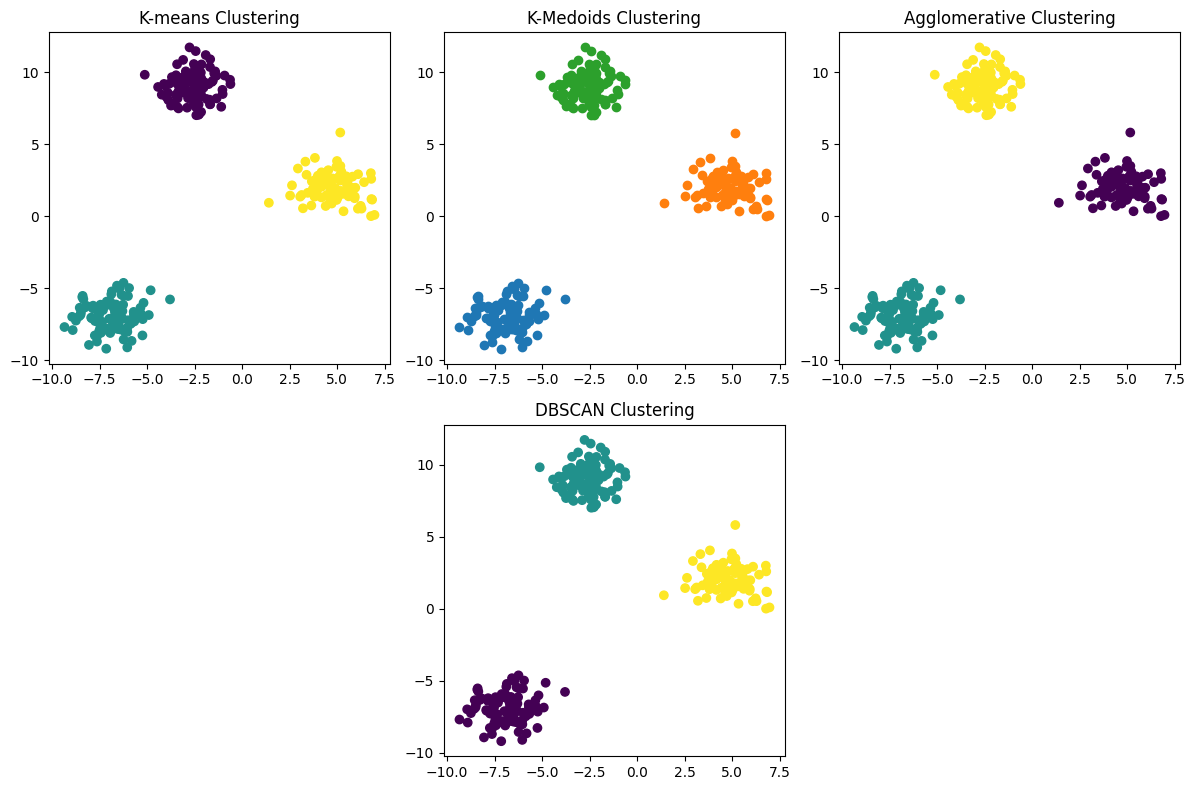

In [14]:


# Visualize clustering results
plt.figure(figsize=(12, 8))

# Plot K-means clustering
plt.subplot(2, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')

# Plot K-Medoids clustering
plt.subplot(2, 3, 2)
for i, cluster in enumerate(kmedoids_labels):
    plt.scatter(X[cluster, 0], X[cluster, 1], label=f'Cluster {i}')
plt.title('K-Medoids Clustering')

# Plot Agglomerative clustering
plt.subplot(2, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')

# # Plot Hierarchical clustering
# plt.subplot(2, 3, 4)
# plot_dendrogram(hierarch_cluster, truncate_mode='level', p=3)
# plt.title('Hierarchical Clustering Dendrogram')

# Plot DBSCAN clustering
plt.subplot(2, 3, 5)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()
